# 2.9.3. Ejemplo de la función atan2

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Marzo 17, 2023 | Explicación de la función atan2: motivación y ejemplos |



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Para imprimir algo bonito
import sympy as sp
from IPython.display import Math                 
def imprimir (texto, variable, unidad=False):
    if unidad:
        return Math(texto + rf'{sp.latex(variable)}' + unidad)
    else:
        return Math(texto + rf'{sp.latex(variable)}') 

## Motivación: ¿en qué cuadrante se calculan los ángulos?

Es posible verificar que si tenemos un punto de coordenadas (1,1), se ubicará en el primer cuadrante del plano cartesiano, y si trazamos el vector que representa este forma un ángulo de 45° respecto al eje x. Lo podemos calcular como $$\tan(\theta) = \left(\frac{1}{1}\right) \rightarrow \theta = \arctan\left(\frac{1}{1}\right) = 45^{\circ}$$

In [2]:
x = 1
y = 1
np.rad2deg( np.arctan( y/x ) ) 

45.0

Por el contrario, si tomamos el punto $(-1, -1)$, su vector estará ubicado en el tercer cuadrante. ¿cuál es el ángulo que forma con el eje x? $$\tan(\theta) = \left(\frac{-1}{-1}\right) \rightarrow \theta = \arctan\left(\frac{-1}{-1}\right) = \arctan\left(\frac{1}{1}\right) = ... 45^{\circ}?$$

In [3]:
np.rad2deg( np.arctan( (-y)/(-x) ))

45.0

Lo cual no tiene sentido. Veamos el gráfico de esta situación.

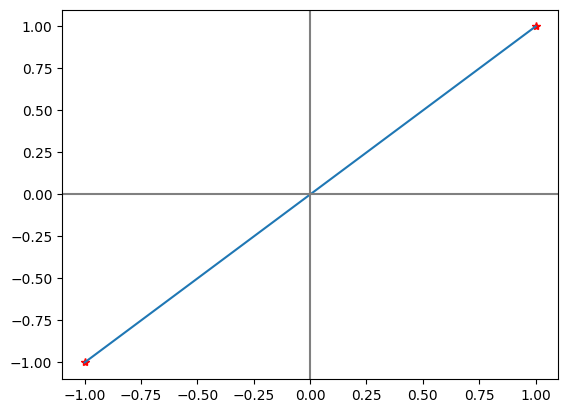

In [4]:
plt.figure()

# Dibujo los puntos
plt.plot(x, y, "*r")
plt.plot(-x, -y, "*r")

# Represento los vetores
plt.plot((-x, x),(-y, y))

# Dibujo los ejes
plt.axvline(x=0, color="grey")
plt.axhline(y=0, color="grey")

plt.show()

# Es posible dibujar los ángulos pero haría el código muy largo.
# - https://stackoverflow.com/questions/25227100/best-way-to-plot-an-angle-between-two-lines-in-matplotlib
# - https://www.tutorialspoint.com/best-way-to-plot-an-angle-between-two-lines-in-matplotlib


Debemos tener en cuenta el cuadrante e el cual está ubicado nuestro vector, o en otras palabras, no hacer simplificaciones de signos al operar. Para ello, existe la función llamada \textbf{atan2(y,x)}, y que en Python se llama ```arctan2()```. Calculemos $\theta_1$ el ángulo que forma el vecotr $(1,1)$ respecto al eje $x$, y $\theta_2$ el ángulo que forma el vecotr $(-1,-1)$ respecto al eje $x$.  

In [5]:
# theta : t
t1 = np.rad2deg( np.arctan2( y, x))
t2 = np.rad2deg( np.arctan2(-y,-x)) 

print(f"t1 = {t1}°")
print(f"t2 = {t2}°")

t1 = 45.0°
t2 = -135.0°


Los resultados anteriores si tiene sentido. Sin embargo, el ángulo $\theta_2$ se está midiendo en sentido horario, y nuestros ángulos los debemos medir en sentido antihorario (solo en el caso del círculo de Mohr se miden en sentido horario, esto debido a la construcción de su curva paramétrica). Simplemente le sumamos 360°, o lo mismo, $2\pi$.

In [6]:
t2 += 360
print(f"t2 = {t2}°")

t2 = 225.0°


## Creando una función

Vamos a calcular los ángulos $2\theta_1$, $2\theta_2$, $2\theta_{1c}$ y $2\theta_{2c}$ que hemos planteado en la construcción del círculo de Mohr. Para ellos usaremos la función ```arctan2``` de Python. Como esta función nos devuelve un resultado en radianes, podríamos crear una nueva función que directamente nos regrese el resultado esperado en grados, sin intermediarios, y llamarla ```arctan2d```; además, haremos que el resultado esté redondeado a dos cifras decimales.

In [7]:
# Definimos una función lambda para arctan2d
arctan2d = lambda y,x : np.rad2deg(np.arctan2(y,x)).round(2)


In [8]:
# Ejemplo anterior
t1 = arctan2d(y, x)
t2 = arctan2d(-y, -x)

print(f"t1 = {t1}°")
print(f"t2 = {t2}°")

t1 = 45.0°
t2 = -135.0°


Aún así, podemos mejorar mucho más esta función para considerar el caso de que el resultado sea negativo.

In [9]:
def arctan2d(y, x):
    t = np.rad2deg(np.arctan2(y,x)).round(2)
    if t < 0:
        t += 360
    return t

In [10]:
# Ejemplo anterior
t1 = arctan2d(y, x)
t2 = arctan2d(-y, -x)

print(f"t1 = {t1}°")
print(f"t2 = {t2}°")

t1 = 45.0°
t2 = 225.0°


## Ejemplo: calculando los ángulos del círculo de Mohr

Recordemos las ecuaciones para calcular los ángulos que debemos recorrer para llegar al estado de esfuezo snormales máximos y mínimos.
$$\tan(2\theta_1) = \frac{2\tau_{xy}}{\sigma_x - \sigma_y}$$
$$\tan(2\theta_2) = \frac{-2\tau_{xy}}{-(\sigma_x - \sigma_y)}$$

y los ángulos que debemos recorrer para llegar al estado de esfuerzos cortantes máximos y mínimos.
$$\cot(2\theta_{1c}) = \frac{-2\tau_{xy}}{\sigma_x - \sigma_y}$$
$$\cot(2\theta_{2c}) = \frac{2\tau_{xy}}{-(\sigma_x - \sigma_y)}$$


El estado de esfuerzos es el siguiente, medido en pascales [Pa]

In [11]:
sx  = 3 
sy  = -2
txy = 1

In [12]:
# Calculemos las direcciones principales para este estado de esfuerzos (tau_n=0).
ang_2t_1  = arctan2d(     +txy, +(sx -sy))
ang_2t_2  = arctan2d(     -txy, -(sx -sy))
ang_2t_1c = arctan2d(-(sx -sy), +txy     )
ang_2t_2c = arctan2d(+(sx -sy), -txy     )

In [13]:
imprimir(r"2\theta_1 = ", ang_2t_1, "°")

<IPython.core.display.Math object>

In [14]:
imprimir(r"2\theta_2 = ", ang_2t_2, "°")

<IPython.core.display.Math object>

In [15]:
imprimir(r"2\theta_{1c} = ", ang_2t_1c, "°")

<IPython.core.display.Math object>

In [16]:
imprimir(r"2\theta_{2c} = ", ang_2t_2c, "°")

<IPython.core.display.Math object>

Verifiquemos las relaciones conocidas: 
$$2\theta_2 = 2\theta_1 + 180°$$
$$2\theta_{1c} = 2\theta_1 - 90°$$
$$2\theta_{2c} = 2\theta_1 + 90°$$

In [17]:
ang_2t_2 - (ang_2t_1 + 180)

0.0

In [18]:
ang_2t_1c - (ang_2t_1 - 90)

360.0

In [19]:
ang_2t_2c - (ang_2t_1 + 90)

0.0

Nota: llegar a 0° es lo mismo que llegar a 360°, dimos una vuelta completa.